In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df = pd.read_csv('/content/Stats survey.csv')

In [80]:
df.head(1)

,Timestamp,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),What year were you in last year (2023) ?,What faculty does your degree fall under?,Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Accommodation Status Last Year (2023),Monthly Allowance in 2023,Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,How strong is your relationship with your parent/s?
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close


In [81]:
df.rename(columns={'Your Sex?':'gender' , 'Your Matric (grade 12) Average/ GPA (in %)':'12 grade' , 'What year were you in last year (2023) ?':'last year' , 'Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)':'last year grade' , 'Your Accommodation Status Last Year (2023)':'accomodation',
                   'Monthly Allowance in 2023':'monthly allowance' , 'Were you on scholarship/bursary in 2023?':'scholarship' , 'Additional amount of studying (in hrs) per week':'addtional hrs' ,
'How often do you go out partying/socialising during the week? ':'socialising' , 'On a night out, how many alcoholic drinks do you consume?':'alcohol' ,
                   'How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)':'bunk classes', 'How many modules have you failed thus far into your studies?':'failde' , 'Are you currently in a romantic relationship?':'relationship' ,
                   'Do your parents approve alcohol consumption?':'approve alcohol' , 'How strong is your relationship with your parent/s?':'parents' , 'What faculty does your degree fall under?' :'faculty'} , inplace=True)


In [83]:
df.head()

,Timestamp,gender,12 grade,last year,faculty,last year grade,accomodation,monthly allowance,scholarship,addtional hrs,How often do you go out partying/socialising during the week?,alcohol,bunk classes,failde,relationship,approve alcohol,parents
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair


In [84]:
df['accomodation'].value_counts()

accomodation
Private accommodation/ stay with family/friends    335
Non-private accommodation ie. Res                   48
Name: count, dtype: int64

In [85]:
df['accomodation'] = df['accomodation'].str.replace('Private accommodation/ stay with family/friends' , 'Private').str.replace('Non-private accommodation ie. Res' , 'gvrmt')

In [86]:
df.isnull().sum()

Timestamp                                                          0
gender                                                             2
12 grade                                                           7
last year                                                         73
faculty                                                            7
last year grade                                                   86
accomodation                                                      23
monthly allowance                                                 31
scholarship                                                        8
addtional hrs                                                      3
How often do you go out partying/socialising during the week?      2
alcohol                                                            2
bunk classes                                                       3
failde                                                             3
relationship                      

In [87]:
df.duplicated().sum()

0

In [88]:
df['monthly allowance'].value_counts()

monthly allowance
R 4001- R 5000     159
R 5001 - R 6000    101
R 6001 - R 7000     58
R 7001 - R 8000     30
R 8000+             27
Name: count, dtype: int64

In [89]:
df['scholarship'].value_counts()

scholarship
No                     352
Yes (NSFAS, etc...)     46
Name: count, dtype: int64

In [90]:
df['scholarship'].loc[1]

'Yes (NSFAS, etc...)'

In [91]:
df['scholarship'] = df['scholarship'].str.replace('Yes (NSFAS, etc...)' , 'Yes')

In [92]:
df['scholarship'].value_counts()

scholarship
No     352
Yes     46
Name: count, dtype: int64

In [93]:
df['alcohol'].value_counts()

alcohol
5-8    111
3-5     91
1-3     90
8+      86
0       26
Name: count, dtype: int64

In [100]:
df['Timestamp'] = df['Timestamp'].str.split().str.get(0)


In [106]:
df['monthly allowance'] = df['monthly allowance'].str.replace('R' , '')

In [121]:
df['last year'] = df['last year'].str.replace('2nd Year' , '2').str.replace('1st Year' , '1').str.replace('3rd Year' , '3').str.replace('4th Year' , '4')

In [122]:
df['last year'].value_counts()

last year
2               153
1               128
3                40
4                 7
Postgraduate      5
Name: count, dtype: int64

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Timestamp                                                       406 non-null    object 
 1   gender                                                          404 non-null    object 
 2   12 grade                                                        399 non-null    float64
 3   last year                                                       333 non-null    object 
 4   faculty                                                         399 non-null    object 
 5   last year grade                                                 320 non-null    float64
 6   accomodation                                                    383 non-null    object 
 7   monthly allowance                                    

In [124]:
df.describe()

,12 grade,last year grade
count,399.000000,320.000000
mean,77.989724,66.268469
std,7.048618,9.147906
min,34.000000,30.000000
25%,74.000000,60.000000
50%,78.000000,65.000000
75%,83.000000,73.000000
max,99.000000,95.220000


###EDA

## Timestamp

<Axes: xlabel='Timestamp'>

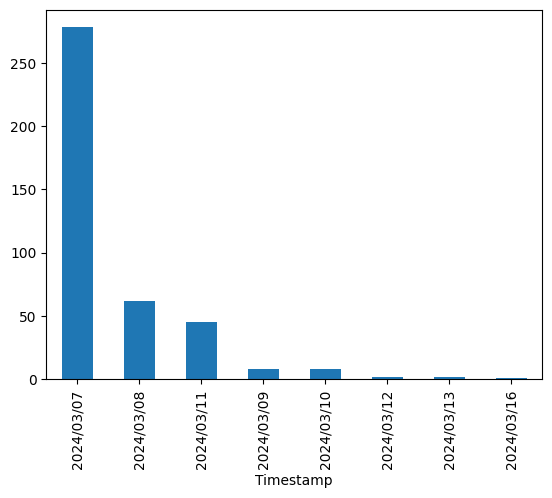

In [113]:
df['Timestamp'].value_counts().plot(kind='bar')

# How much male and female enroll in University ?

<Axes: xlabel='gender'>

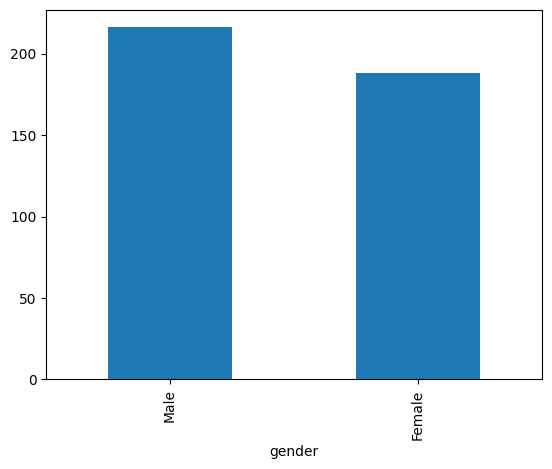

In [126]:
df['gender'].value_counts().plot(kind='bar')

# Total grades of Students in 12 class

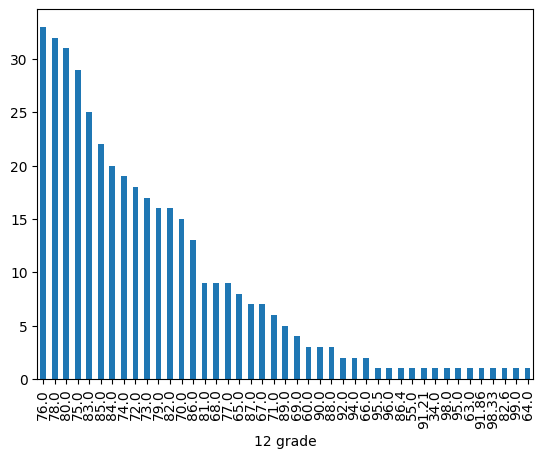

In [133]:
df['12 grade'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

# Total grade of Students in 12 class and their Gender

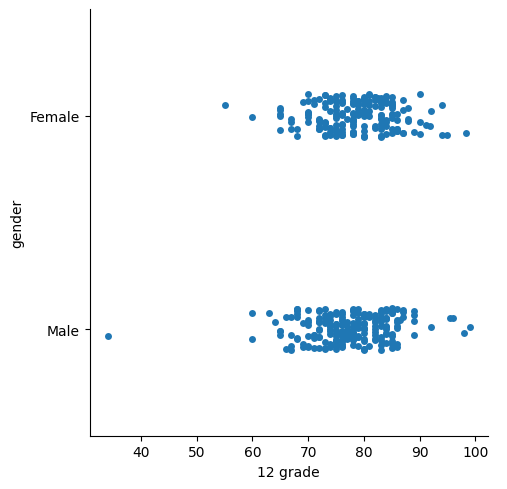

In [139]:
sns.catplot(data=df , x='12 grade' , y='gender')

# Students and their last year

<Axes: xlabel='last year'>

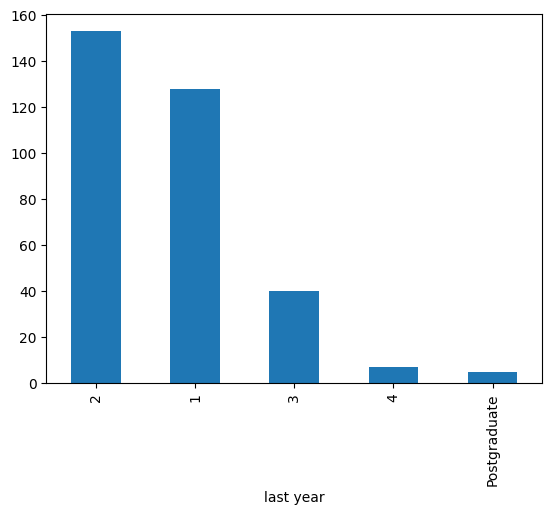

In [142]:
df['last year'].value_counts().plot(kind='bar')

# How much Male and Female are drop and in which year?

In [143]:
pd.crosstab(df['gender'] , df['last year'])

last year,1,2,3,4,Postgraduate
gender,,,,,
Female,61,79,18,1,1
Male,67,74,22,6,4


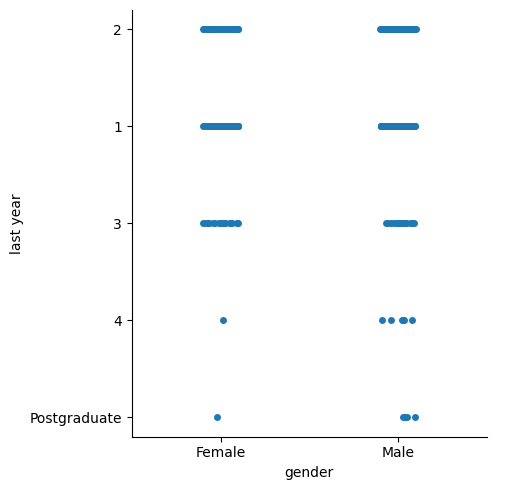

In [147]:
sns.catplot(data=df , x='gender' , y='last year')

# In which Faculty enroll Female and Male?

In [152]:
pd.crosstab(df['gender'] , df['faculty'])

faculty,AgriSciences,Arts & Social Sciences,Economic & Management Sciences,Education,Engineering,Law,Medicine and Health Services,Science
gender,,,,,,,,
Female,8,31,85,6,12,6,8,27
Male,14,16,126,0,25,4,2,29


# In which faculty studensts enroll more ?

<Axes: xlabel='faculty'>

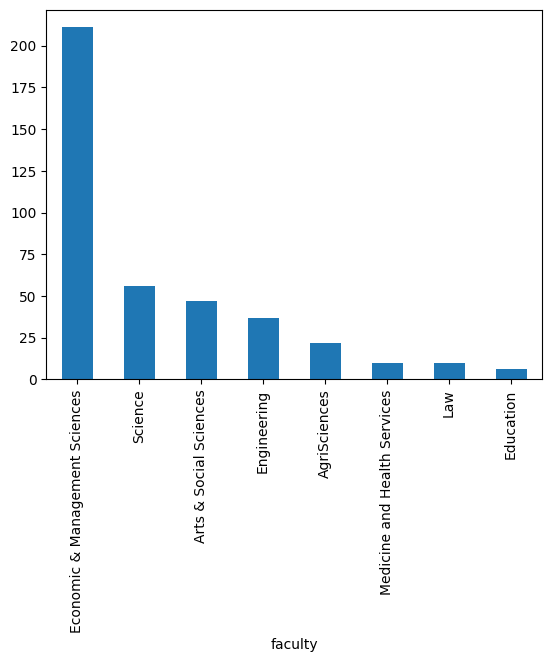

In [240]:
df['faculty'].value_counts().plot(kind='bar')

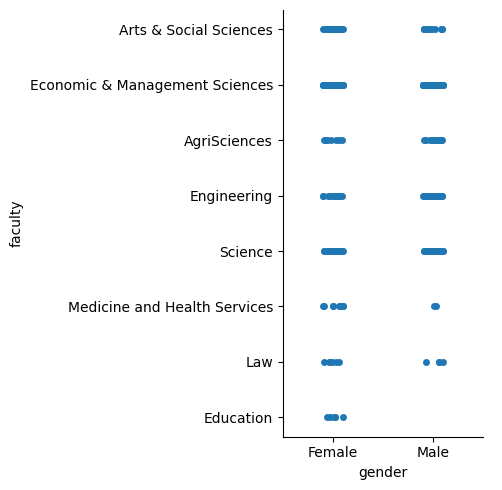

In [149]:
sns.catplot(data=df , x='gender' , y='faculty')

# Gender and their last year grade

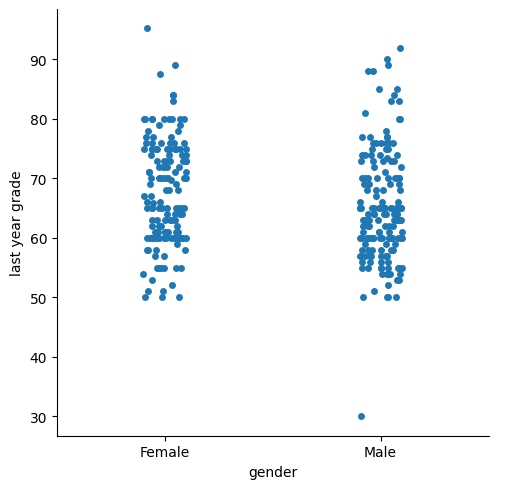

In [154]:
sns.catplot(data=df , x='gender' , y='last year grade')

#  last year and their grades

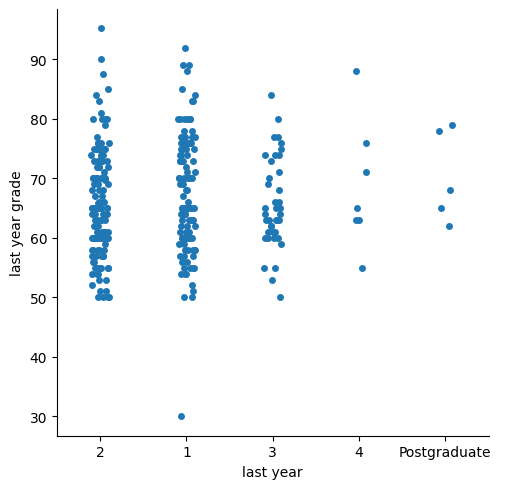

In [158]:
sns.catplot(data=df , x='last year' , y='last year grade')

# Gender and their Accomodation

In [163]:
pd.crosstab(df['gender']  ,df['accomodation'])

accomodation,Private,gvrmt
gender,,
Female,161,14
Male,174,34


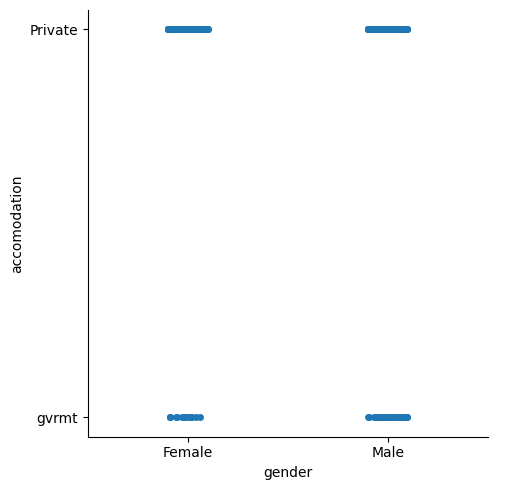

In [167]:
sns.catplot(data=df , x='gender' , y='accomodation')

# Gender and their Monthly allowance

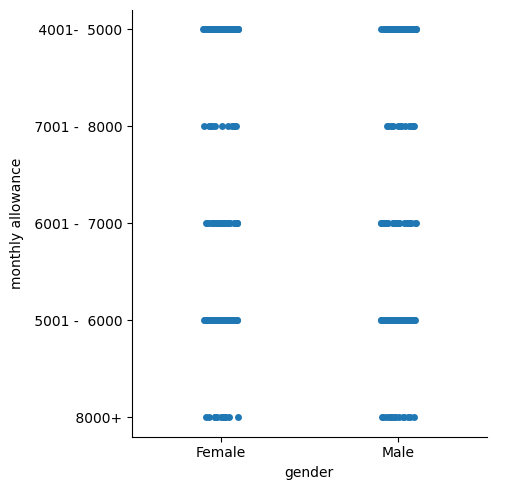

In [170]:
sns.catplot(data=df , x='gender' , y='monthly allowance')

In [172]:
pd.crosstab(df['gender'] , df['monthly allowance'])

monthly allowance,4001- 5000,5001 - 6000,6001 - 7000,7001 - 8000,8000+
gender,,,,,
Female,70,45,27,14,13
Male,89,56,31,16,14


# Does monthly allowance depends on thier grade?

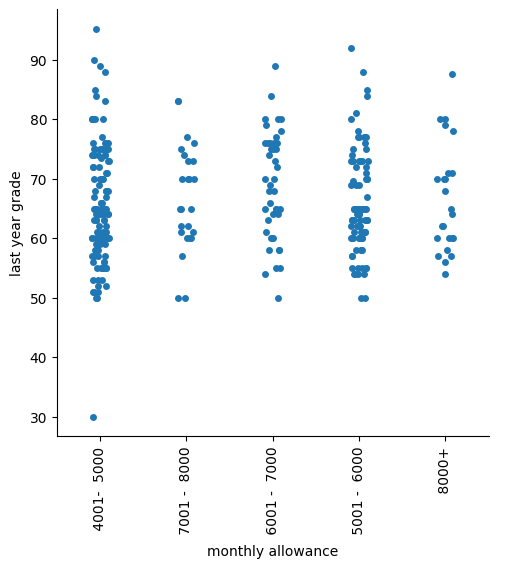

In [176]:
sns.catplot(data=df , x='monthly allowance' , y='last year grade')
plt.xticks(rotation=90)
plt.show()

# Which Gender got a more Scholarship ?

In [178]:
pd.crosstab(df['gender'] , df['scholarship'])

scholarship,No,Yes
gender,,
Female,165,19
Male,187,27


# Which Gender doing studies for more Hours?

In [180]:
pd.crosstab(df['gender'] , df['addtional hrs'])

addtional hrs,0,1-3,3-5,5-8,8+
gender,,,,,
Female,7,38,49,41,53
Male,13,45,56,40,61


# Which Gender going out more ?

In [191]:
pd.crosstab(df['socialising'] , df['gender'])

gender,Female,Male
socialising,,
0,6,11
1,44,64
2,38,49
3,30,33
4+,3,13
Only weekends,67,46


# How much students are study addtional hrs and socialising?

In [192]:
pd.crosstab(df['socialising'] , df['addtional hrs'])

addtional hrs,0,1-3,3-5,5-8,8+
socialising,,,,,
0,1,3,5,3,5
1,6,20,30,17,35
2,2,22,29,17,17
3,3,15,13,17,15
4+,5,7,3,0,1
Only weekends,3,16,25,27,41


# How much students are study addtional hrs and socialising and whats their gender?

<Axes: xlabel='socialising', ylabel='addtional hrs'>

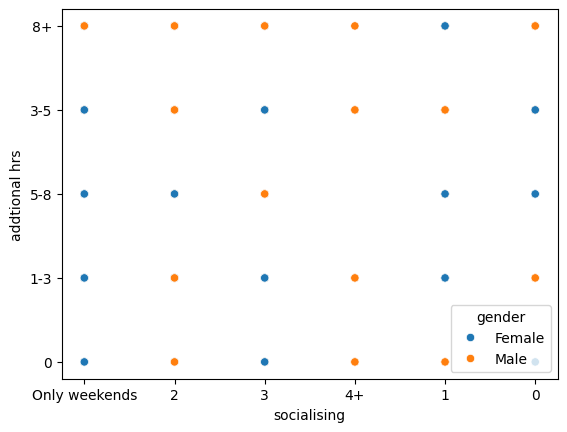

In [194]:
sns.scatterplot(data=df , x='socialising' , y='addtional hrs' , hue='gender')

# Which gender took more Alcohol?

In [196]:
pd.crosstab(df['gender'] , df['alcohol'])

alcohol,0,1-3,3-5,5-8,8+
gender,,,,,
Female,13,68,51,44,12
Male,13,22,40,67,74


# How much students are going out side more but taking Alcohol less?

In [197]:
pd.crosstab(df['socialising'] , df['alcohol'])

alcohol,0,1-3,3-5,5-8,8+
socialising,,,,,
0,10,1,1,4,1
1,6,25,21,33,23
2,4,12,26,24,21
3,1,9,12,18,23
4+,0,1,3,5,7
Only weekends,5,42,28,27,11


# data of students who took alcohol and studying addtional hrs

In [199]:
pd.crosstab(df['alcohol'] , df['addtional hrs'])

addtional hrs,0,1-3,3-5,5-8,8+
alcohol,,,,,
0,3,6,7,2,8
1-3,2,12,25,20,31
3-5,4,18,26,19,24
5-8,3,26,25,21,35
8+,8,21,22,19,16


# How much students take alcohol and doing additional hrs studies and Whats their gender ?

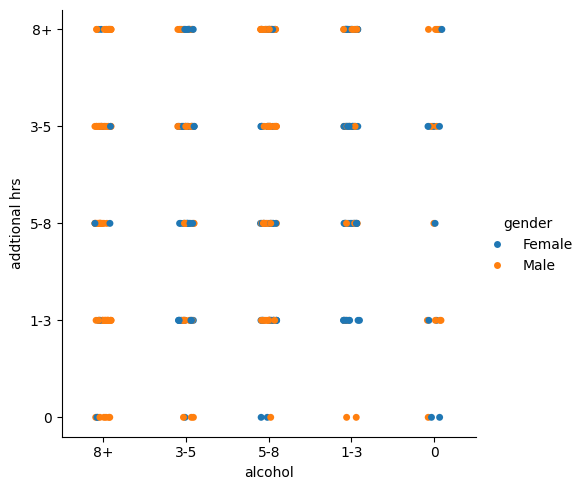

In [202]:
sns.catplot(data=df , x='alcohol' , y='addtional hrs' , hue='gender')

# How much students are taking alcohol and  bunk their classes ?

In [204]:
pd.crosstab(df['alcohol'] , df['bunk classes'])

bunk classes,0,1,2,3,4+
alcohol,,,,,
0,24,1,0,0,1
1-3,72,13,1,1,2
3-5,48,16,17,6,4
5-8,45,27,21,11,7
8+,25,18,24,6,13


# How much students are taking alcohol and bunking classes and whats their gender?

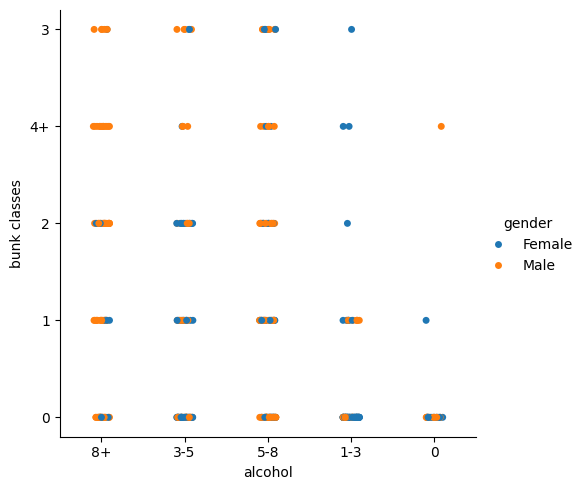

In [205]:
sns.catplot(data=df , x='alcohol' , y='bunk classes' , hue='gender')

# Which gender has good realtion with their parents ?

<Axes: xlabel='gender', ylabel='parents'>

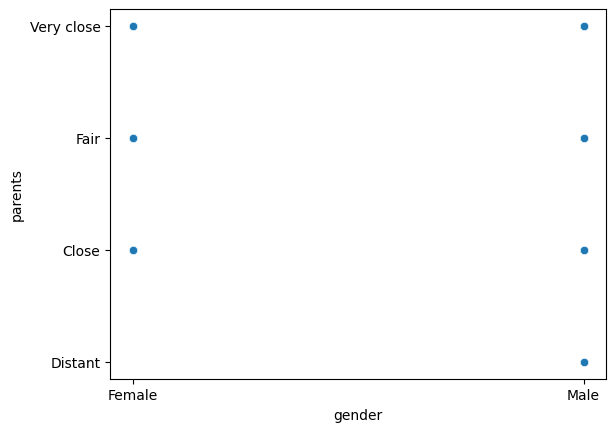

In [212]:
sns.scatterplot(data=df , x='gender' , y='parents')

In [213]:
pd.crosstab(df['gender'] , df['parents'])

parents,Close,Distant,Fair,Very close
gender,,,,
Female,43,0,15,130
Male,54,2,20,139


# Which Gender is most in relationship ?

In [211]:
pd.crosstab(df['relationship'] , df['gender'])

gender,Female,Male
relationship,,
No,106,133
Yes,82,82


# Those students who bunk their classes and failed

In [215]:
pd.crosstab(df['bunk classes'] , df['failed'])

failed,0,1,2,3,4+
bunk classes,,,,,
0,145,31,15,9,13
1,45,14,5,7,4
2,38,6,10,4,5
3,15,5,1,2,1
4+,19,2,0,2,4


# Those students whose family gave approval for alcohol

In [217]:
pd.crosstab(df['gender'] , df['approve alcohol'])

approve alcohol,No,Yes
gender,,
Female,23,163
Male,26,190


# How much parents approved alcohol and hows their relation ?

In [219]:
pd.crosstab(df['approve alcohol'] , df['parents'])

parents,Close,Distant,Fair,Very close
approve alcohol,,,,
No,18,1,9,20
Yes,79,1,25,248


# How much students are bunk their classes and did additonal studies?

In [222]:
pd.crosstab(df['addtional hrs'] , df['bunk classes'])

bunk classes,0,1,2,3,4+
addtional hrs,,,,,
0,13,2,0,1,4
1-3,34,18,17,5,9
3-5,54,24,17,5,4
5-8,41,14,17,6,3
8+,72,17,11,7,7


# Those who did additinal study but still failed?

In [224]:
pd.crosstab(df['addtional hrs'] , df['failed'])

failed,0,1,2,3,4+
addtional hrs,,,,,
0,13,2,1,0,4
1-3,58,10,5,5,5
3-5,69,14,8,7,7
5-8,50,11,8,5,7
8+,72,21,9,7,4


# Those students who get Monthly allowance and Hows relation with their parents ?

In [226]:
pd.crosstab(df['monthly allowance'] , df['parents'])

parents,Close,Distant,Fair,Very close
monthly allowance,,,,
4001- 5000,35,2,19,102
5001 - 6000,26,0,4,71
6001 - 7000,11,0,7,40
7001 - 8000,5,0,1,24
8000+,10,0,1,16


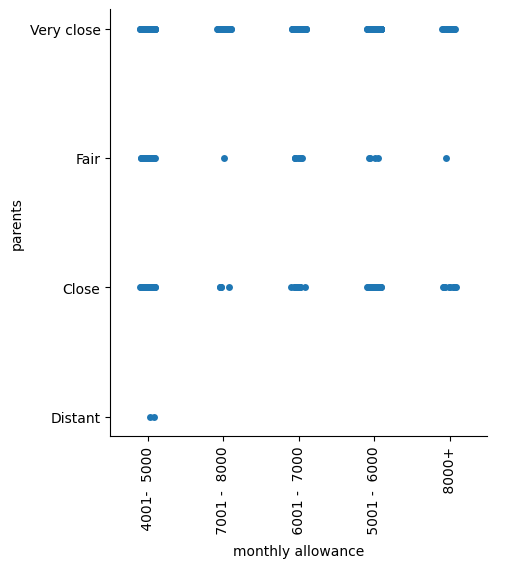

In [231]:
sns.catplot(data=df , x='monthly allowance' , y='parents')
plt.xticks(rotation=90)
plt.show()

# How much students did more studies but still not get scholarship?

In [236]:
pd.crosstab(df['addtional hrs'] , df['scholarship'])

scholarship,No,Yes
addtional hrs,,
0,19,0
1-3,75,8
3-5,89,13
5-8,73,8
8+,95,17


# Those who socialise more and still passed?

In [239]:
pd.crosstab(df['socialising'] , df['failed'])

failed,0,1,2,3,4+
socialising,,,,,
0,10,4,1,0,2
1,68,17,6,11,6
2,64,8,7,3,5
3,49,8,4,1,1
4+,11,2,0,2,1
Only weekends,61,19,13,7,12


# Which faculty has more failure students?

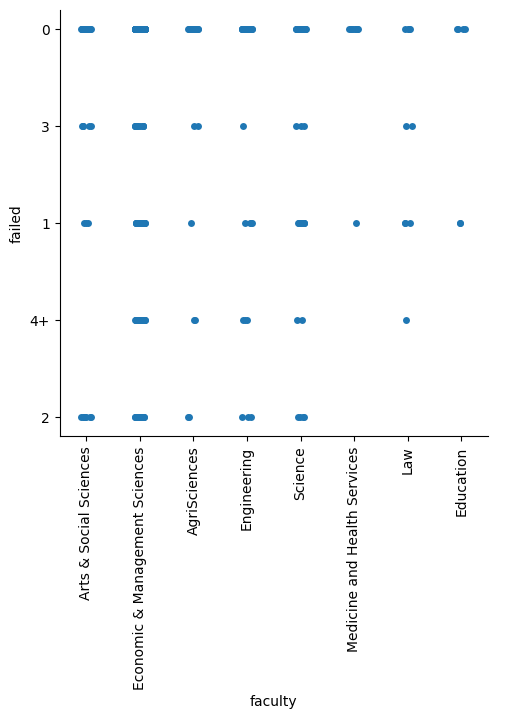

In [242]:
sns.catplot(data=df , x='faculty' , y='failed')
plt.xticks(rotation=90)
plt.show()

In [243]:
pd.crosstab(df['faculty'] , df['failed'])

failed,0,1,2,3,4+
faculty,,,,,
AgriSciences,15,1,2,2,2
Arts & Social Sciences,32,3,7,5,0
Economic & Management Sciences,134,32,15,11,19
Education,4,2,0,0,0
Engineering,25,4,3,1,3
Law,4,3,0,2,1
Medicine and Health Services,9,1,0,0,0
Science,36,11,4,3,2


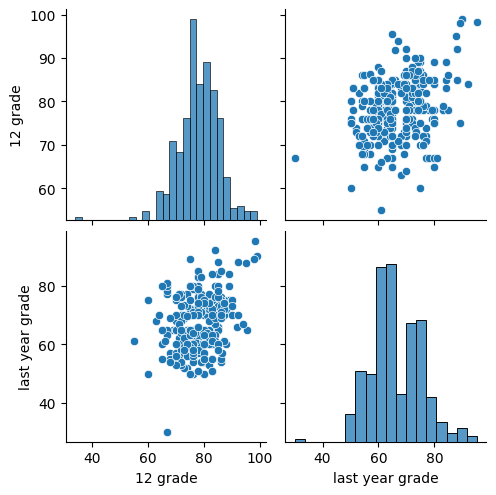

In [251]:
sns.pairplot(df)